In [360]:
%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

hd = fits.open('/Users/legolason/study/dr14q/DR14Q_v4_4.fits')
print hd.info()
hd[0].header
data=hd[1].data

index=np.where(data['N_SPEC'] >0,True,False)
print np.sum(index)

ra=data['RA'][index]
dec=data['DEC'][index]

#~/.astropy/cache/astroquery/Alma/
#np.savetxt('ra_dec.txt',np.c_[ra,dec]) #72757 repeated spectra

Filename: /Users/legolason/study/dr14q/DR14Q_v4_4.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (7055,)   uint8   
  1  DR14Q_v4_4    1 BinTableHDU    328   526356R x 105C   [18A, D, D, J, I, J, I, 4A, D, D, 4A, D, D, D, I, D, D, D, K, K, K, K, K, K, I, I, I, 51J, 51J, 51J, 51A, D, D, I, A, I, I, A, 5D, 5D, 5D, 5D, D, 5D, D, D, D, D, D, D, D, D, D, D, D, E, D, D, D, D, D, D, E, I, D, D, E, I, D, D, E, I, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 4A, 4A, D, E, D, D, D, D, D, D, D, D, I, D, D, D]   
None
72757


In [15]:
zw=(np.where((data['plate'] == 7848) & (data['mjd'] == 56959) & (data['fiberid'] == 79),True,False))
print np.sum(zw)
print data['plate'][zw][0],data['mjd'][zw][0],data['zwarning'][zw][0]

1
7848 56959 0


ROSAT 883
XMM soft 2217
XMM hard 2208
Galex 72449
2MASS 3812
WISE 52780
UKIDSS 16303
FIRST 3615


/Applications/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in greater


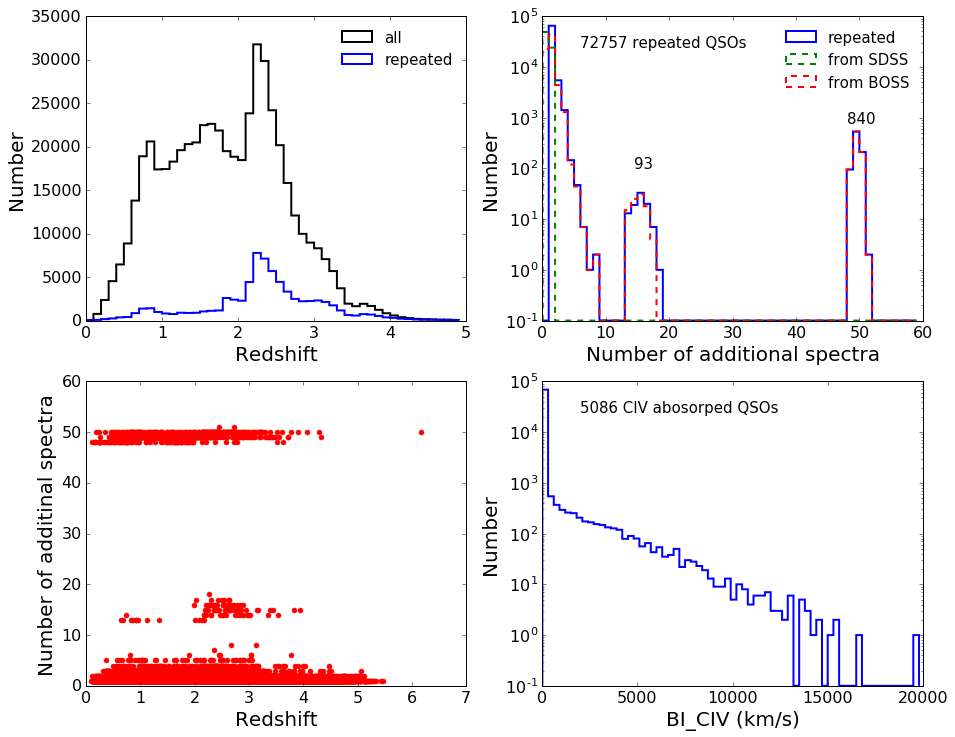

In [7]:
#plt.hist(data1['N_SPEC'],np.arange(0,60,1),log=True)
#print (np.max(data1['MJD']))
#a=plt.hist(data1['MJD'],np.arange(51000,58000,200))
plt.style.use('my')
fig=plt.figure(figsize=(15,12))
plt.subplot(221)
bin1=np.arange(0,5,0.1)
a=plt.hist(data['z'],bin1,histtype='step',lw=2,label='all',color='black')
b=plt.hist(data['z'][index],bin1,histtype='step',lw=2,label='repeated')
plt.xlabel('Redshift')
plt.ylabel('Number')
plt.legend(frameon=False,fontsize=15)
ax2=plt.subplot(222)
bin2=np.arange(0,60,1)
c=plt.hist(data['n_spec'][index],bin2,histtype='step',lw=2,log=True,label='repeated')
e=plt.hist(data['n_spec_sdss'][index],bin2,histtype='step',lw=2,log=True,ls='dashed',label='from SDSS')
f=plt.hist(data['n_spec_boss'][index],bin2,histtype='step',lw=2,log=True,ls='dashed',label='from BOSS')
plt.text(0.8,0.65, str(np.sum(np.where(data['n_spec'][index]>20,True,False))),transform=ax2.transAxes,size=15 )
plt.text(0.24,0.5, str(np.sum(np.where((data['n_spec'][index]>10) & (data['n_spec'][index]<40),True,False))),transform=ax2.transAxes,size=15 )
plt.text(0.1,0.9,'72757 repeated QSOs',transform=ax2.transAxes,size=15)
plt.xlabel('Number of additional spectra')
plt.ylabel('Number')
plt.legend(frameon=False,fontsize=15)
plt.subplot(223)
plt.plot(data['z'][index],data['n_spec'][index],'r.')
plt.xlabel('Redshift')
plt.ylabel('Number of additinal spectra')
plt.legend(frameon=False,fontsize=15)
ax4=plt.subplot(224)
d=plt.hist(data['bi_civ'][index],np.arange(0,20000,300),histtype='step',log=True,lw=2)
plt.xlabel('BI_CIV (km/s)')
plt.ylabel('Number')
plt.text(0.1,0.9, str(np.sum(np.where(data['bi_civ'][index] != 0, True,False)))+' CIV abosorped QSOs',transform=ax4.transAxes,size=15)
plt.savefig('info.eps')

#---------cross match-----------
for i in zip(['rass_counts','flux_0.2_2.0kev','flux_2.0_12.0kev','galex_matched','jmag','w1mag','ukidss_matched','first_matched'],\
             ['ROSAT','XMM soft','XMM hard','Galex','2MASS','WISE','UKIDSS','FIRST']):
    print i[1],np.sum(np.where(data[i[0]][index] > 0,True,False))


In [159]:
#search Ned spectra
from astroquery.ned import Ned
n=len(data['SDSS_NAME'])
c=0
name=[]

for i in range(1):

    spec = Ned.get_spectra_async('SDSS J'+data['SDSS_NAME'][i])
    if i%1000 == 0:
        print i
    if spec != []:    
        print 'SDSS J'+data['SDSS_NAME'][i]
        name.append('SDSS J'+data['SDSS_NAME'][i])
        c=c+1
        


0


[ 6.578712   6.310957   6.287121   6.7953978  6.44       6.9680266
  6.207056   6.445232   6.1713705  6.949    ]
['010628.63+182832.3' '090349.82+501235.2' '104845.05+463718.3'
 '113934.04+495340.4' '114816.64+525150.3' '124244.26+455442.9'
 '125059.53+481823.6' '125506.65+475744.6' '140733.12+531254.0'
 '234950.71+061509.9']
[  16.61932261  135.95759961  162.18774289  174.89183375  177.06936259
  190.68445039  192.748052    193.77773593  211.88803563  357.46129661] [ 18.47564255  50.20978988  46.62177074  49.8945713   52.86397533
  45.9119326   48.30657988  47.96241277  53.2150215    6.25275502]


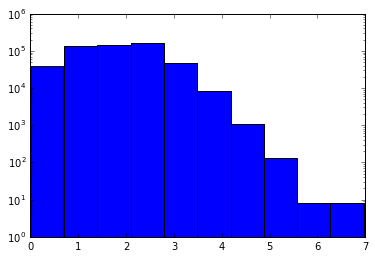

In [110]:
plt.hist(data['z'],log=True)
highz= np.where(data['z'] > 6.)
print data['z'][highz]
print data['SDSS_name'][highz]
print data['ra'][highz],data['dec'][highz]

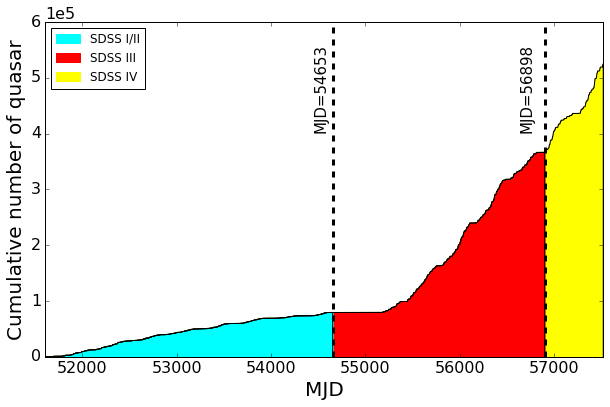

In [376]:
import pandas as pd
fig=plt.figure(figsize=(10,6))
ax=plt.subplot(111)
plt.style.use('my')

mjd1=54653 # SDSS I & II
mjd2=56898
mjd3=np.max(data['mjd'])
a=plt.hist(data['mjd'],np.arange(51000,mjd3,1),cumulative=True,color='k',histtype='step')
n=len(a[0])
x1=np.linspace(51000,mjd3,n)
y=a[0]
plt.fill_between(x1,y,color='yellow',label='SDSS IV')

a=plt.hist(data['mjd'][data['mjd'] < mjd2],np.arange(51000,mjd2,1),cumulative=True,color='k',histtype='step')
n=len(a[0])
x1=np.linspace(51000,mjd2,n)
y=a[0]
plt.fill_between(x1,y,color='r',label='SDSS III')

a=plt.hist(data['mjd'][data['mjd'] < mjd1],np.arange(51000,mjd1,1),cumulative=True,color='k',histtype='step')
n=len(a[0])
x1=np.linspace(51000,mjd1,n)
y=a[0]
plt.fill_between(x1,y,label='SDSS I/II',color='cyan')


plt.xlim(np.min(data['mjd']),mjd3)
plt.plot([54653,54653],[0,600000],'k--')
plt.plot([56898,56898],[0,600000],'k--')
plt.text(0.48,0.9,'MJD=54653',transform=ax.transAxes,size=15,rotation=90)
plt.text(0.85,0.9,'MJD=56898',transform=ax.transAxes,size=15,rotation=90)
plt.xlabel('MJD')
plt.ylabel('Cumulative number of quasar')
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc='upper left')



#plt.legend(loc=2)

In [119]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
pos = coords.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')
xid = SDSS.query_region(pos, spectro=True)
#print(xid)
#sp = SDSS.get_spectra(matches=xid)
#im = SDSS.get_images(matches=xid, band='g')

print(SDSS.AVAILABLE_TEMPLATES)
print SDSS.cache_location

{u'star_L1': 15, u'star_FA': 5, u'galaxy': [24, 25, 26], u'star_G': [8, 9], u'star_F': [6, 7], u'star_OB': 1, u'galaxy_lrg': 28, u'galaxy_late': 27, u'star_M5': 13, u'star_M3': 12, u'star_M1': 11, u'galaxy_early': 23, u'qso': 29, u'star_M8': 14, u'star_K': 10, u'star_O': 0, u'star_B': 2, u'star_A': [3, 4], u'star_carbon': [17, 18, 19], u'qso_bal': [30, 31], u'star_wd': [16, 20, 21], u'qso_bright': 32, u'star_Ksubdwarf': 22}


In [135]:
from astroquery.xmatch import XMatch
from astroquery.vizier import Vizier
Vizier.ROW_LIMIT = -1
catalog_list = Vizier.find_catalogs('J/ApJS/194/45')
print({k:v.description for k,v in catalog_list.items()})
catalogs = Vizier.get_catalogs(catalog_list.keys())
print (catalogs)

{u'J/ApJS/194/45': u'QSO properties from SDSS-DR7 (Shen+, 2011)'}
TableList with 1 tables:
	'0:J/ApJS/194/45/catalog' with 15 column(s) and 105783 row(s) 


In [1]:
%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt 
import numpy as np

plate_103_list=np.genfromtxt('/Users/legolason/study/dr14q/spec_database/103.txt')
plate_104_list=np.genfromtxt('/Users/legolason/study/dr14q/spec_database/104.txt')
hd = fits.open('/Users/legolason/study/dr14q/catalog/DR14Q_v4_4.fits')
data=hd[1].data
plate=data['plate']
mjd=data['mjd']
fiberid=data['fiberid']
path=[]
a=[]
n_103=0
n_104=0
for i in range(len(plate)):
    if plate[i] >= 1960 and plate[i] <= 3509:
        if plate[i] in plate_103_list:
            n_103=n_103+1
            path.append('wget https://data.sdss.org/sas/dr14/sdss/spectro/redux/103/spectra/lite/'\
            +str(plate[i])+'/spec-'+str(plate[i]).zfill(4)+'-'+str(mjd[i])+'-'+str(fiberid[i]).zfill(4)+'.fits')
        elif plate[i] in plate_104_list:
            n_104=n_104+1
            path.append('wget https://data.sdss.org/sas/dr14/sdss/spectro/redux/104/spectra/lite/'\
            +str(plate[i])+'/spec-'+str(plate[i]).zfill(4)+'-'+str(mjd[i])+'-'+str(fiberid[i]).zfill(4)+'.fits')
        else:
            path.append('wget https://data.sdss.org/sas/dr14/sdss/spectro/redux/26/spectra/lite/'\
            +str(plate[i])+'/spec-'+str(plate[i]).zfill(4)+'-'+str(mjd[i])+'-'+str(fiberid[i]).zfill(4)+'.fits')
    else:
        if plate[i] < 1960:
            a.append('wget https://data.sdss.org/sas/dr14/sdss/spectro/redux/26/spectra/lite/'\
            +str(plate[i]).zfill(4)+'/spec-'+str(plate[i]).zfill(4)+'-'+str(mjd[i])+'-'+str(fiberid[i]).zfill(4)+'.fits')
        if plate[i] >= 3520 and plate[i] < 10000:
            path.append('wget https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/spectra/lite/'\
            +str(plate[i])+'/spec-'+str(plate[i]).zfill(4)+'-'+str(mjd[i])+'-'+str(fiberid[i]).zfill(4)+'.fits')
        if plate[i] >= 10000:
            path.append('wget https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/spectra/lite/'\
            +str(plate[i])+'/spec-'+str(plate[i])+'-'+str(mjd[i])+'-'+str(fiberid[i]).zfill(4)+'.fits')
            
print n_103,n_104
np.savetxt('/Users/legolason/study/dr14q/spec_database/dr14q_526356.txt',a,fmt='%.120s')

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1069: UserWarning: Bad val "$TEMPLATE_BACKEND" on line #41
	"backend      : $TEMPLATE_BACKEND
"
	in file "/Applications/anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle"
	Key backend: Unrecognized backend string "$template_backend": valid strings are [u'pgf', u'cairo', u'MacOSX', u'CocoaAgg', u'gdk', u'ps', u'GTKAgg', u'nbAgg', u'GTK', u'Qt5Agg', u'template', u'emf', u'GTK3Cairo', u'GTK3Agg', u'WX', u'Qt4Agg', u'TkAgg', u'agg', u'svg', u'GTKCairo', u'WXAgg', u'WebAgg', u'pdf']
  (val, error_details, msg))


21 0


In [7]:
# download the miss quasar of DR7 and DR12
%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt 
import numpy as np

plate_103_list=np.genfromtxt('/Users/legolason/study/dr14q/spec_database/103.txt')
plate_104_list=np.genfromtxt('/Users/legolason/study/dr14q/spec_database/104.txt')
#hd = fits.open('/Users/legolason/study/dr14q/catalog/dr12_miss_433.fits')
hd = fits.open('/Users/legolason/study/dr14q/catalog/dr7_miss_259.fits')
data=hd[1].data

plate=data['plate']
mjd=data['mjd']
fiberid=data['fiber']
#fiberid=data['fiberid']
path=[]
a=[]
n_103=0
n_104=0
for i in range(len(plate)):
    if plate[i] >= 1960 and plate[i] <= 3509:
        if plate[i] in plate_103_list:
            n_103=n_103+1
            path.append('wget https://data.sdss.org/sas/dr14/sdss/spectro/redux/103/spectra/lite/'\
            +str(plate[i])+'/spec-'+str(plate[i]).zfill(4)+'-'+str(mjd[i])+'-'+str(fiberid[i]).zfill(4)+'.fits')
        elif plate[i] in plate_104_list:
            n_104=n_104+1
            path.append('wget https://data.sdss.org/sas/dr14/sdss/spectro/redux/104/spectra/lite/'\
            +str(plate[i])+'/spec-'+str(plate[i]).zfill(4)+'-'+str(mjd[i])+'-'+str(fiberid[i]).zfill(4)+'.fits')
        else:
            path.append('wget https://data.sdss.org/sas/dr14/sdss/spectro/redux/26/spectra/lite/'\
            +str(plate[i])+'/spec-'+str(plate[i]).zfill(4)+'-'+str(mjd[i])+'-'+str(fiberid[i]).zfill(4)+'.fits')
    else:
        if plate[i] < 1960:
            path.append('wget https://data.sdss.org/sas/dr14/sdss/spectro/redux/26/spectra/lite/'\
            +str(plate[i]).zfill(4)+'/spec-'+str(plate[i]).zfill(4)+'-'+str(mjd[i])+'-'+str(fiberid[i]).zfill(4)+'.fits')
        if plate[i] >= 3520 and plate[i] < 10000:
            path.append('wget https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/spectra/lite/'\
            +str(plate[i])+'/spec-'+str(plate[i]).zfill(4)+'-'+str(mjd[i])+'-'+str(fiberid[i]).zfill(4)+'.fits')
        if plate[i] >= 10000:
            path.append('wget https://data.sdss.org/sas/dr14/eboss/spectro/redux/v5_10_0/spectra/lite/'\
            +str(plate[i])+'/spec-'+str(plate[i])+'-'+str(mjd[i])+'-'+str(fiberid[i]).zfill(4)+'.fits')
            
print n_103,n_104
#np.savetxt('/Users/legolason/study/dr14q/catalog/download_dr12_miss_433.txt',path,fmt='%.120s')
np.savetxt('/Users/legolason/study/dr14q/catalog/download_dr7_miss_259.txt',path,fmt='%.120s')

0 0


In [104]:
hd = fits.open('/Users/legolason/study/dr14q/dr7_bh_May_2011.fits')
data=hd[1].data
index=np.where((data['plate']==1079) & (data['mjd']==52621) & (data['fiber']==531))
print index
print data['redshift'][index]

(array([3595]),)
[ 0.78680003]


In [276]:
from astropy.io import fits
hd=fits.open('/Users/legolason/study/dr14q/DR14Q_v4_4.fits')
data=hd[1].data
lite=data['SDSS_name']
#print data.columns
print data.field(0)

np.savetxt('/Users/legolason/study/dr14q/lite_DR14Q.txt',\
           np.c_[data.field(0),data.field(1),data.field(2),\
            data.field(4),data.field(5),data.field(6),data.field(8)],fmt='%s',\
           header='name,ra,dec,plate,mjd,fiberid,z')

['000000.45+174625.4' '000000.57+055630.8' '000000.66+145828.8' ...,
 '235959.90+031606.9' '235959.94+204315.8' '235959.98+344449.6']


In [339]:
from astropy.io import fits
hd=fits.open('/Users/legolason/study/dr14q/lite_DR14Q.fits')

data=hd[1].data
print data[0]
ind=np.where((data.field(3) == data.field(7)) & (data.field(4) == data.field(8)) & (data.field(5) == data.field(9)),True,False)
print np.sum(ind)
ind_re=[not i for i in ind]
print np.sum(ind_re)
newdata=np.column_stack((data.field(0)[ind_re],data.field(1)[ind_re],data.field(2)[ind_re],data.field(6)[ind_re],data.field(3)[ind_re],data.field(4)[ind_re],\
               data.field(5)[ind_re],data.field(7)[ind_re],data.field(8)[ind_re],data.field(9)[ind_re]))
np.savetxt('/Users/legolason/study/dr14q/repeat_dr14.txt',\
          newdata,fmt='%s',\
          header="name,ra,dec,z,plate1,mjd1,fiberid1,plate2,mjd2,fiberid2")

('000000.45+174625.4', 0.00189827435634, 17.773739123799999, 7596, 56945, 162, 2.3090000000000002, 6173, 56238, 528, "'v5_10_0'", "Decimal('6950325365131681792')", 0.0019, 17.773738000000002, 2.30769, 0.001242, 0, "'QSO'", "''", 1, 2, 2.0593135930914359e-06)
503838
130681


In [6]:
#test drop_duplicate
import numpy as np
import pandas as pd
data=np.genfromtxt('/Users/legolason/study/dr14q/qso.csv',delimiter=',')

data[:,5]=np.round(data[:,5],4)
data[:,6]=np.round(data[:,6],4)
df = pd.DataFrame(data)
dup=df.drop_duplicates((5,6),keep='first')
print dup.shape


[ -0.984913  -0.687012  -0.779147 ...,  27.943791  27.637361  27.480021]
[ -0.9849  -0.687   -0.7791 ...,  27.9438  27.6374  27.48  ]
(558515, 12)


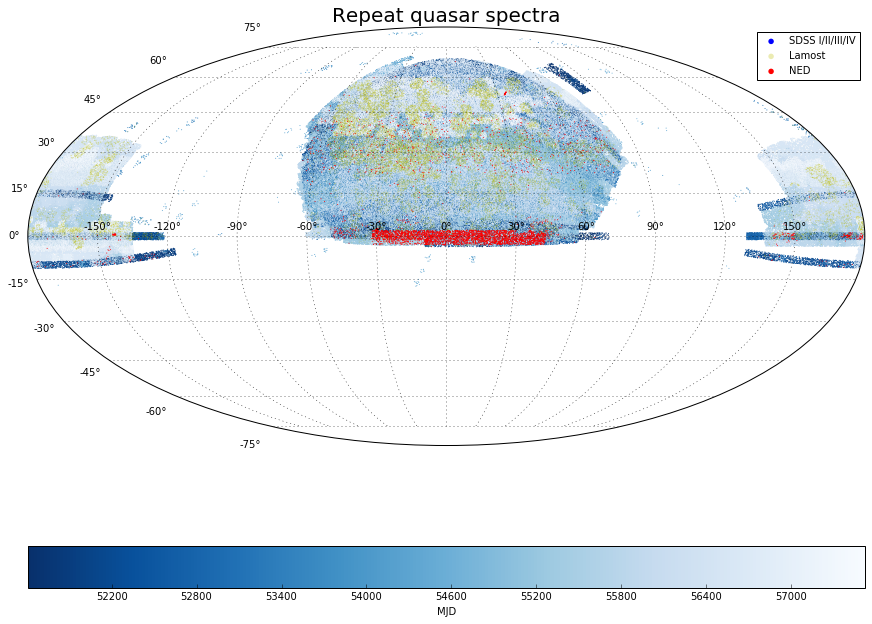

In [45]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits

hd = fits.open('/Users/legolason/study/dr14q/DR14Q_v4_4.fits')

data=hd[1].data
RA = data['RA']
DEC = data['DEC']
RA -= 180
RA *= np.pi / 180
DEC *= np.pi / 180


plt.figure(figsize=(15,12))
ax=plt.subplot(111)
ax = plt.axes(projection='mollweide')
plt.scatter(RA,DEC,s=1,c=data['mjd'],cmap=plt.cm.Blues_r,
            edgecolors='none', linewidths=0,label='SDSS I/II/III/IV')

plt.grid(True)

plt.title('Repeat quasar spectra',fontsize=20)
cb = plt.colorbar(orientation='horizontal')
cb.set_label('MJD')

#-------lamost--------------------
hd = fits.open('/Users/legolason/study/dr14q/DR14&lamost.fits')
lamost=hd[1].data
ra_lamo=lamost['ra_1']
dec_lamo=lamost['dec_1']
ra_lamo-=180
ra_lamo*=np.pi/180

dec_lamo*=np.pi/180
plt.scatter(ra_lamo,dec_lamo,s=1,color='y',edgecolors='none', linewidths=0,label='Lamost',alpha=0.3)


#---------NED coverage--------------------------------
from astropy import units as u
from astropy.coordinates import SkyCoord

ned_spec=np.genfromtxt('/Users/legolason/study/dr14q/ned_qso_name.txt',dtype='|S32',delimiter=',')
ra_ned=[]
dec_ned=[]
for i in range(len(ned_spec)):
    c= SkyCoord(str(ned_spec[i]), unit=(u.hourangle, u.deg))
    ra_ned.append(c.ra.deg)
    dec_ned.append(c.dec.deg)
ra_ned=np.array(ra_ned)
dec_ned=np.array(dec_ned)
ra_ned -= 180
ra_ned *= np.pi / 180
dec_ned *= np.pi / 180    

plt.scatter(ra_ned,dec_ned,s=1,color='r',edgecolors='none', linewidths=0,label='NED')


lgnd=plt.legend(loc='best',scatterpoints=1,fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.savefig('/Users/legolason/study/dr14q/paper_figure/skymap.eps')

1990-10-11
1990-02-17
1991-04-23
1990-02-18
1990-02-16
1991-02-15
1990-02-16
1990-02-18
1991-04-23
1990-02-19
1990-02-17
1990-02-20
1991-04-22
1991-04-24
1990-02-20
1990-04-22
1990-02-16
1990-02-20
1991-04-23
1991-04-23
1990-02-15
1990-02-20
1990-09-20
1990-02-17
1990-04-23
1990-09-20
1990-10-10


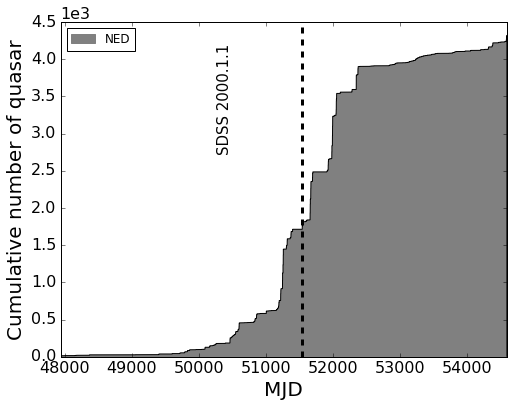

In [53]:
#read info from NED spectra
from astropy.io import fits
from astropy.time import Time
import glob, os
plt.style.use('my')

path='/Users/legolason/study/dr14q/spec_database/ned_spec/'
os.chdir(path)
mjd=[]

for file in zip(glob.glob("*.gz"),range(len(glob.glob("*.gz")))):
    #print file[0]
    ned_spec=fits.open(path+str(glob.glob("*fits.gz")[file[1]]))
    head=file[0][0:2]
    #print head
    if head == '2Q': # 2QZ
        date=ned_spec[0].header['date-obs']
        a=str(date[0:4])+'-'+str(date[5:7].zfill(2))+'-'+str(date[8:10].zfill(2))   #formate  2000-01-01
        mjd.append(Time(a).mjd)
        
    if head == '2d': #2dfgrs
        date=ned_spec[1].header['utdate']
        a=str(date[0:4])+'-'+str(date[5:7].zfill(2))+'-'+str(date[8:10].zfill(2))
        mjd.append(Time(a).mjd)
    if head == '6d': #6df
        date=ned_spec[0].header['utdate_v']
        a=str(date[0:4])+'-'+str(date[5:7].zfill(2))+'-'+str(date[8:10].zfill(2))
        mjd.append(Time(a).mjd)
    if head == 'DE':#deep2
        date=ned_spec[1].header['date']
        a=str(date[0:4])+'-'+str(date[5:7].zfill(2))+'-'+str(date[8:10].zfill(2))
        mjd.append(Time(a).mjd)
    if head == 'FB': #FBQS

        date=ned_spec[0].header['date-obs'].lstrip()  # we dont use date-obs cause it's mass for different sources
        #print date
        if  int(date[6]) > 8: #before 2000
            n=len(date)  # some ___8/10/97 some are 11/02/97
            a='19'+str(date[n-2:n]) +'-'+ str(date[n-5:n-3].zfill(2)) +'-'+ str(date[0:n-6].zfill(2))   
            mjd.append(Time(a).mjd)    
        if int(date[0]) > 8: # for 97/10/01
            a='19'+str(date[0:2])+'-'+str(date[3:5].zfill(2))+'-'+str(date[6:8].zfill(2)) 
            mjd.append(Time(a).mjd)
        #print a
        #print '------'
    if head == 'GA':#GAMA
        date=ned_spec[0].header['date-obs']
        #print date
        a=str(date[0:4])+'-'+str(date[6:7].zfill(2))+'-'+str(date[8:10].zfill(2))   #formate  2000-01-01
        mjd.append(Time(a).mjd)

    if head == 'HS': #HS
        date=ned_spec[0].header['date-obs']
        #print date[0:8]
        if  int(date[6]) > 6: #before 2000
            a='19'+str(date[6:8])+'-'+str(date[3:5].zfill(2))+'-'+str(date[0:2].zfill(2))   #formate  2000-01-01
            mjd.append(Time(a).mjd)
        if int(date[6]) < 5: # after 2000
            a='20'+str(date[6:8])+'-'+str(date[3:5].zfill(2))+'-'+str(date[0:2].zfill(2))   #formate  2000-01-01
            mjd.append(Time(a).mjd)

    if head == 'PG': #PG
        date=ned_spec[0].header['date-obs']
        #print date[0:8]
        if  int(date[6]) > 6: #before 2000
            a='19'+str(date[6:8])+'-'+str(date[3:5].zfill(2))+'-'+str(date[0:2].zfill(2))   #formate  2000-01-01
            mjd.append(Time(a).mjd)
        if int(date[6]) < 5: # after 2000
            a='20'+str(date[6:8])+'-'+str(date[3:5].zfill(2))+'-'+str(date[0:2].zfill(2))   #formate  2000-01-01
            mjd.append(Time(a).mjd)      
        print a
    if head == 'WI': #WIG
        a=np.round(ned_spec[0].header['utmjd'],0)
        mjd.append(a)

    if head == 'zC': #zCOMOS
        mjd.append(Time(ned_spec[0].header['date-obs']).mjd)
        
plt.figure(figsize=(8,6))
ax=plt.subplot(111)
a=plt.hist(mjd,np.arange(np.min(mjd),np.max(mjd),1),cumulative=True,color='k',histtype='step')
n=len(a[0])
x1=np.linspace(np.min(mjd),np.max(mjd),n)
y=a[0]
plt.fill_between(x1,y,label='NED',color='grey')
plt.plot([51544,51544],[0,4500],'k--')
plt.xlim(np.min(mjd),np.max(mjd))
plt.xlabel('MJD')
plt.ylabel('Cumulative number of quasar')
plt.text(0.35,0.9,'SDSS 2000.1.1',transform=ax.transAxes,size=15,rotation=90)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend(loc=2)

In [475]:
# to change date for one fits file
a=fits.open('/Users/legolason/study/dr14q/spec_database/ned_spec/FBQS_J142106.0+385522:S:w2000.fits.gz',mode='update')
hd=a[0].header
print hd['date-obs']
hd.set('date-obs','08/07/97')
del hd['bandid\x01']
#print hd['date-obs']
print hd['date-obs']
a.writeto('/Users/legolason/study/dr14q/spec_database/ned_spec/untitled folder/FBQS_J142106.0+385522:S:w2000.fits.gz')

           8/07/97
08/07/97


In [19]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.time import Time
import glob, os

path='/Users/legolason/study/dr14q/spec_database/ned_spec/'
os.chdir(path)

for file in zip(glob.glob("FB*.gz"),range(len(glob.glob("FB*.gz")))):
    #print file[0]
    head=file[0][0:2]
    ned_spec=fits.open(path+str(glob.glob("FB*fits.gz")[file[1]]))

    if head == '2Q': # 2QZ
        z=ned_spec[0].header['z_this']
        data=ned_spec[0].data
        wave=np.linspace(3591.1675,7961.61275,1024) # still have a problem to select the Wavelength start point
        plt.figure()
        plt.plot(wave/(1.+z),data[:],'k')
        plt.ylabel(r'Flux (counts) ')
        plt.xlabel(r'Wavelength in rest frame ($\rm \AA$)')
        plt.savefig('/Users/legolason/study/dr14q/spec_database/ned_spec_fig/'+str(file[0])+'.eps')
        
    if head == 'FB':
        try:
            wv_st=ned_spec[0].header['DB_lmbd1']
            wv_end=ned_spec[0].header['DB_lmbd2']
            n=ned_spec[0].header['naxis1']
        
            wv=np.linspace(wv_st,wv_end,n)
            data=ned_spec[0].data
            plt.figure()
            plt.plot(wv,data.flatten(),'k')
            plt.ylabel(r'Flux ($erg\;s^{-1}\;cm^{-2}\;\rm \AA^{-1}$) ')
            plt.xlabel(r'Wavelength in obs frame ($\rm \AA$)')
            plt.savefig('/Users/legolason/study/dr14q/spec_database/ned_spec_fig/'+str(file[0])+'.eps')
        except KeyError:
            pass
    #if head == 'WI'

In [110]:
#build master catalog   dr14(526356)+dr7_miss(259)+dr12_miss(433)
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits


dr14=fits.open('/Users/legolason/study/dr14q/catalog/DR14Q_v4_4.fits')
dr12_miss=fits.open('/Users/legolason/study/dr14q/catalog/dr12_miss_433.fits')
dr7_miss=fits.open('/Users/legolason/study/dr14q/catalog/dr7_miss_259.fits')

data14=dr14[1].data
name_14=data14['sdss_name']
ra_14=data14['ra']
dec_14=data14['dec']
plate_14=data14['plate']
mjd_14=data14['mjd']
fiberid_14=data14['fiberid']

data12=dr12_miss[1].data
name_12=data12['sdss_name']
ra_12=data12['ra']
dec_12=data12['dec']
plate_12=data12['plate']
mjd_12=data12['mjd']
fiberid_12=data12['fiberid']


data7=dr7_miss[1].data
name_7=data7['sdss_name']
ra_7=data7['ra']
dec_7=data7['dec']
plate_7=data7['plate']
mjd_7=data7['mjd']
fiberid_7=data7['fiber']

name =np.concatenate((name_12,name_7,name_14),axis=0)
ra =np.concatenate((ra_12,ra_7,ra_14),axis=0)
dec =np.concatenate((dec_12,dec_7,dec_14),axis=0)
plate =np.concatenate((plate_12,plate_7,plate_14),axis=0)
mjd =np.concatenate((mjd_12,mjd_7,mjd_14),axis=0)
fiberid =np.concatenate((fiberid_12,fiberid_7,fiberid_14),axis=0)



data=np.c_[name,ra,dec,plate,mjd,fiberid]

np.savetxt('/Users/legolason/study/dr14q/catalog/master_catalog.txt',data,fmt='%18s',delimiter=',')
#sort the catalog by topcat is fastest!!! to produce master_catalog_sorted.fits # name ra dec


(527048,) (527048,)


In [143]:
#produce perfect_repeat_sources catalog
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

data=np.genfromtxt('/Users/legolason/study/dr14q/catalog/raw_Xmach_allepoch.csv',dtype='|S32',delimiter=',')
#name,ra,dec,p,m,f,ra,dec,z,plate,mjd,fiberid,class,zwarning,sn1_r,GroupID,GroupSize,Separation
ind=np.where((data[:,3] == data[:,9]) & (data[:,4] == data[:,10]) & (data[:,5] == data[:,11]))
data_new=np.delete(data,ind,axis=0)
np.savetxt('/Users/legolason/study/dr14q/catalog/Xmatch_allepoch.csv',\
           np.c_[data_new[:,0:6],data_new[:,8:15]],fmt='%18s')

In [141]:
import pandas as pd
df = pd.DataFrame(data_new)
dup=df.drop_duplicates(0,keep='first')
#print dup.shape
np.savetxt('/Users/legolason/study/dr14q/catalog/Xmatch_unique.csv',\
           np.c_[data_new[:,0:6],data_new[:,8:15]],fmt='%18s')

(82589, 17)
                        0                 1                2     3      4   \
0       000000.45+174625.4  0.00189827435634    17.7737391238  7596  56945   
1       000000.66+145828.8  0.00275643255031    14.9746754858  6177  56268   
2       000001.41+200044.1  0.00591209257078    20.0122584525  6110  56279   
4       000001.63+303109.6  0.00681879771992    30.5193561209  6498  56565   
5       000003.17+011510.6   0.0132289952098     1.2529671217  4296  55499   
6       000003.46+160253.6    0.014419235451    16.0482344965  6172  56269   
7       000004.61+035122.4   0.0192231836469    3.85623149674  8741  57390   
8       00004.967-001642.0   0.0206958530495  -0.278343319588  7848  56959   
9       000005.02-003829.0   0.0209285632913  -0.641393000659  4216  55477   
10      000005.51-012727.1   0.0229765438994   -1.45755302192  4354  55810   
11      000005.88+340252.3   0.0245067545321    34.0478724624  7144  56564   
12      000007.05+060333.8   0.0294144234202    6.05

In [178]:
import numpy as np
import pandas as pd
data = np.genfromtxt('/Users/legolason/study/dr14q/zzz.txt',dtype='|S32')

df = pd.DataFrame({'A':data[:,0],
                   'B':data[:,1],
                   'C':data[:,2],
                   'D':data[:,3],
                   'E':data[:,4].astype(float),
                   'sn':data[:,10].astype(float),
                  })
print df
print '-----------------'
#print df.drop_duplicates(0,keep='first')
#print df

df= df.sort_values(by=['A','sn'])
print df.groupby('A').count()
print df.drop_duplicates('A',keep='last')

dir(df.groupby)

                      A                 B              C      D       E    sn
0  '000000.45+174625.4'  0.00189827435634  17.7737391238  2.309  7596.0  30.0
1  '000000.66+145828.8'  0.00275643255031  14.9746754858  2.497  6177.0  10.0
2  '000001.41+200044.1'  0.00591209257078  20.0122584525   3.09  6110.0  20.0
3  '000001.41+200044.1'  0.00591209257078  20.0122584525   3.09  6110.0  30.0
4  '000001.41+200044.1'  0.00591209257078  20.0122584525   3.09  6110.0  15.0
-----------------
                      B  C  D  E  sn
A                                   
'000000.45+174625.4'  1  1  1  1   1
'000000.66+145828.8'  1  1  1  1   1
'000001.41+200044.1'  3  3  3  3   3
                      A                 B              C      D       E    sn
0  '000000.45+174625.4'  0.00189827435634  17.7737391238  2.309  7596.0  30.0
1  '000000.66+145828.8'  0.00275643255031  14.9746754858  2.497  6177.0  10.0
3  '000001.41+200044.1'  0.00591209257078  20.0122584525   3.09  6110.0  30.0


['__call__',
 '__class__',
 '__cmp__',
 '__delattr__',
 '__doc__',
 '__format__',
 '__func__',
 '__get__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'im_class',
 'im_func',
 'im_self']

In [103]:
names  = np.array(['NAME_1111111', 'NAME_2111111111111111111', 'NAME_3'])
floats = np.array([ 0.1234 ,  0.5678 ,  0.9123 ])
floats1 = np.array([ 0.12 ,  0.5 ,  0.93 ])
int3 = np.array([ 1234 ,  5678 ,  9123 ])

ab = np.zeros(names.size, dtype=[('var1', 'U20'), ('var2', float)])
ab['var1'] = names
ab['var2'] = floats

np.savetxt('test.txt', ab, fmt="%20s %10.3f")

In [118]:
a=['2.3','34.']

zzz=pd.DataFrame({'A': ['name1','name2'],
                  'B':np.array(a,dtype=float)})
print zzz

AttributeError: 'str' object has no attribute 'type'

In [190]:
dates=pd.date_range('20110101',periods=6)

df = pd.DataFrame(np.vstack((dates,np.random.randn(6,4))), index=dates, columns=list('BACD'))
print df

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [194]:
print dates
a= np.random.randn(6,4)

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06'],
              dtype='datetime64[ns]', freq='D')


In [210]:
a=np.array(['a','b','c']).reshape(3,-1)
b=np.zeros([3,2])
print a,b
print np.concatenate((a,b),axis=1)
print b.dtype

[['a']
 ['b']
 ['c']] [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
[['a' '0.0' '0.0']
 ['b' '0.0' '0.0']
 ['c' '0.0' '0.0']]
float64


In [288]:
df2 = pd.DataFrame({ 'A' : 1.,
   ....:                      'B' : pd.Timestamp('20130102'),
   ....:                      'D' : pd.Series([1,2,3,4],index=list(range(1,5)),dtype='float32'),
   ....:                      'C' : np.array([3] * 4,dtype='int32'),
   ....:                      'E' : pd.Categorical(["test","train","test","train"]),
   ....:                      'F' : 'foos' })
   ....: 
g= df.groupby('A')


In [304]:
df = pd.DataFrame([[1, 5], [1, 4],[1,2], [5, 6]], columns=['A', 'B'])
#print df
df_s=df.sort_values(by=['A','B'],ascending=True)
print df_s
df_s.groupby('A').nth([-2,-1])

   A  B
2  1  2
1  1  4
0  1  5
3  5  6


,B
A,
1,4
1,5
5,6
